# Laboratorio 1

Importamos librerias

In [582]:
import pandas as pd
import quandl
import matplotlib.pyplot as plt
import numpy as np
from selenium.webdriver.chrome.webdriver import WebDriver
import warnings
from datetime import date
%matplotlib inline
quandl.ApiConfig.api_key = 'riVhxyiwNtvu-2DbzJsD'

Descargamos el nombre de los tickers para poder conseguir los precios de cada activo facilmente

In [583]:
tw = pd.read_csv("DVY_holdingsMAR17.csv",skiprows=10,usecols=[0,3,5,6]).dropna()
tw1 = pd.read_csv("DVY_holdingsApr.csv",skiprows=10,usecols=[0,3,5,6]).dropna()
tw2 = pd.read_csv("DVY_holdingsMay.csv",skiprows=10,usecols=[0,3,5,6]).dropna()
tw3 = pd.read_csv("DVY_holdingsJun.csv",skiprows=10,usecols=[0,3,5,6]).dropna()
tw4 = pd.read_csv("DVY_holdingsJul.csv",skiprows=10,usecols=[0,3,5,6]).dropna()
tw5 = pd.read_csv("DVY_holdingsAgo.csv",skiprows=10,usecols=[0,3,5,6]).dropna()
tw6 = pd.read_csv("DVY_holdingsSep.csv",skiprows=10,usecols=[0,3,5,6]).dropna()
tw7 = pd.read_csv("DVY_holdingsOct.csv",skiprows=10,usecols=[0,3,5,6]).dropna()
tw8 = pd.read_csv("DVY_holdingsNov.csv",skiprows=10,usecols=[0,3,5,6]).dropna()
tw9 = pd.read_csv("DVY_holdingsDic.csv",skiprows=10,usecols=[0,3,5,6]).dropna()
tw10 = pd.read_csv("DVY_holdingsEne.csv",skiprows=10,usecols=[0,3,5,6]).dropna()
tw11 = pd.read_csv("DVY_holdingsFeb.csv",skiprows=10,usecols=[0,3,5,6]).dropna()
tws = [tw,tw1,tw2,tw3,tw4,tw5,tw6,tw7,tw8,tw9,tw10,tw11]

In [584]:
tw = pd.read_csv("DVY_holdingsMAR17.csv",usecols=[1],nrows=4).dropna()
tw1 = pd.read_csv("DVY_holdingsApr.csv",usecols=[1],nrows=4).dropna()
tw2 = pd.read_csv("DVY_holdingsMay.csv",usecols=[1],nrows=4).dropna()
tw3 = pd.read_csv("DVY_holdingsJun.csv",usecols=[1],nrows=4).dropna()
tw4 = pd.read_csv("DVY_holdingsJul.csv",usecols=[1],nrows=4).dropna()
tw5 = pd.read_csv("DVY_holdingsAgo.csv",usecols=[1],nrows=4).dropna()
tw6 = pd.read_csv("DVY_holdingsSep.csv",usecols=[1],nrows=4).dropna()
tw7 = pd.read_csv("DVY_holdingsOct.csv",usecols=[1],nrows=4).dropna()
tw8 = pd.read_csv("DVY_holdingsNov.csv",usecols=[1],nrows=4).dropna()
tw9 = pd.read_csv("DVY_holdingsDic.csv",usecols=[1],nrows=4).dropna()
tw10 = pd.read_csv("DVY_holdingsEne.csv",usecols=[1],nrows=4).dropna()
tw11 = pd.read_csv("DVY_holdingsFeb.csv",usecols=[1],nrows=4).dropna()
numacc = [tw,tw1,tw2,tw3,tw4,tw5,tw6,tw7,tw8,tw9,tw10,tw11]

In [585]:
def rend(tw,m,y):
    data = quandl.get_table('WIKI/PRICES', ticker = [tw.iloc[:,0].values], 
                        qopts = { 'columns': ['ticker', 'date', 'adj_close'] }, 
                        date = { 'gte': date(year = y, month = m, day = 1), 'lte': '2018-03-01' }, 
                        paginate=True)
    
    data = data.pivot(index="date",columns="ticker",values="adj_close")
    ret = data.apply(lambda x: np.log(x/x.shift(1)).dropna()).fillna(0)
    
    return data.fillna(0),ret

In [586]:
def peso(tickerstotales,tickerscapturados):
    mt = np.setdiff1d(tickerstotales.iloc[:,0],tickerscapturados.columns)
    newtw = tickerstotales
    for i in range(len(tickerstotales)):
        for j in mt:
            if j == tickerstotales.iloc[i,0]:
                newtw = newtw.drop(i)     
    return newtw.sort_values("Ticker").reset_index(drop=True)

In [619]:
def rebalanceo(tws,año):
    meses = np.arange(3,13)
    if año == 2017:
        xmes = [rend(tws[i],meses[i],año) for i in range(len(meses))]
        xmes1 = [xmes[i][0] for i in range(len(xmes))]
        retmes = [xmes[i][1] for i in range(len(xmes))]
        xpeso = [peso(tws[i],xmes1[i]) for i in range(len(meses))]
    else:
        xmes = [rend(tws[i+8],i,año) for i in range(1,3)]
        xmes1 = [xmes[i][0] for i in range(len(xmes))]
        retmes = [xmes[i][1] for i in range(len(xmes))]
        xpeso = [peso(tws[i+8],xmes1[i]) for i in range(len(xmes))]
    
    return xmes1,xpeso,retmes

In [588]:
def mes(x):
    for i in range(len(x)):
        x[i]['date'] = x[i].index
    
    kxmes = [x[i].groupby(pd.Grouper(key='date', freq='M')) for i in range(len(x))]
    kxmes = [[kxmes[i].get_group(x) for x in kxmes[i].groups] for i in range(len(kxmes))]
    kxmes = [[i[j].drop("date",axis=1) for j in range(len(i))] for i in kxmes]
    
    return kxmes

In [589]:
def navdia(tw,rendtw,numacc):
    f = [[float(j.iloc[i,2].replace(",","")) for i in range(len(j))] for j in tw[1]]
    dot = [[[np.dot(f[k],z.iloc[i,:]) for i in range(len(z))] for z in rendtw[k]] 
           for k in range(len(rendtw))]
    k = [float(numacc[i].iloc[3,0].replace(",","")) for i in range(len(numacc))]
    n=[[[x/k[j] for x in y] for y in dot[j]] for j in range(len(dot))]
    
    return n

In [590]:
def navmes(tws,numacc):
    f = [[float(j.iloc[i,3].replace(",","")) for i in range(len(j))] for j in tws]
    f = [sum(i) for i in f]
    y = [float(numacc[i].iloc[3,0].replace(",","")) for i in range(len(numacc))]
    n = [f[i]/y[i] for i in range(len(f))]
    
    return n

In [592]:
def mevo(kxmes):
    mediaxmes = [[np.mean(kxmes[j][i]) for i in range(len(kxmes[j]))] for j in range(len(kxmes))]
    volxmes = [[np.std(kxmes[j][i]) for i in range(len(kxmes[j]))] for j in range(len(kxmes))]
    return mediaxmes,volxmes

In [593]:
def rendxpeso(mediaxmes,tw):
    x =[[sum(np.multiply(tw[1][j].iloc[:,1],mediaxmes[j][i])) 
          for i in range(len(mediaxmes[j]))] for j in range(len(mediaxmes))]
    return x

In [797]:
def grafica(x,y):
    plt.plot(np.arange(len(r[0])),r[0][0:x] + r[x],label=y)
    plt.legend()
    plt.title("Rendimientos")
    plt.xlabel("Tiempo")
    plt.ylabel("E[Rp]")
    
    return

In [749]:
def rendimientos(x):
    rebalanceo = r[0][0:x] + r[x]
    
    j = 'Rebalanceo tiempo '+str(x)
    if x == 0:
        return pd.DataFrame({'Sin rebalanceo': r[0]})
    
    else:
        return pd.DataFrame({'Sin rebalanceo': r[0], j: rebalanceo})

Acomodamos para que quede la fecha como indice y los precios de los activos en cada columna

In [620]:
tw2017 = rebalanceo(tws,2017)
tw2018 = rebalanceo(tws,2018)

In [624]:
rtw2017 = tw2017[2]
rtw2018 = tw2018[2]

In [514]:
mestw2017 = mes(tw2017[0])
mestw2018 = mes(tw2018[0])

In [444]:
navdiario2017 = navdia(tw2017,mestw2017,numacc)
navdiario2018 = navdia(tw2018,mestw2018,numacc)

In [451]:
navme = navmes(tws,numacc)

In [625]:
rendmes2017 = mes(rtw2017)
rendmes2018 = mes(rtw2018)

In [626]:
mediaxmes2017,volxmes2017=mevo(rendmes2017)
mediaxmes2018,volxmes2018=mevo(rendmes2018)

In [627]:
r2017 = rendxpeso(mediaxmes2017,tw2017)
r2018 = rendxpeso(mediaxmes2018,tw2018)

In [705]:
r = r2017 + r2018

(None, None)

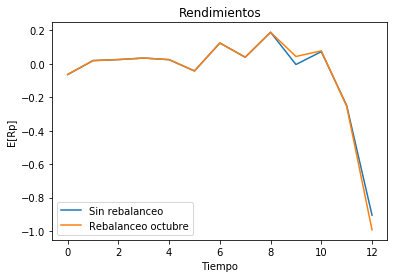

In [804]:
grafica(0,"Sin rebalanceo"),grafica(9,"Rebalanceo octubre")

In [805]:
rendimientos(9)

,Rebalanceo tiempo 9,Sin rebalanceo
0,-0.064001,-0.064001
1,0.019230,0.019230
2,0.025361,0.025361
3,0.034384,0.034384
4,0.024826,0.024826
5,-0.042712,-0.042712
6,0.124374,0.124374
7,0.039482,0.039482
8,0.188710,0.188710
9,0.043894,-0.004029


# Creamos nuestro portafolio, con nuestros pesos

In [773]:
w = [np.random.random(len(tws[0].iloc[:,0])) for i in range(1000)]
sw = [sum(i) for i in w]
w = list(map(lambda x,y: x/y,w,sw))
media = mediaxmes2017[0][0]
varianza = DVYret.var()
desvest = DVYret.std()
cov = DVYret.cov()

NameError: name 'DVYret' is not defined

In [754]:
wret = [[sum(media*i),np.sqrt(np.dot(np.transpose(i), np.dot(cov, i))),i] for i in w]
port = pd.DataFrame(wret,columns = ["E[Rp]","Sigma","W"])

NameError: name 'w' is not defined

In [755]:
plt.plot(port.iloc[:,1],port.iloc[:,0],"o")
plt.title("Primer Portafolio")
plt.xlabel("Desv. Est.")
plt.ylabel("E[Rp]")

NameError: name 'port' is not defined

In [756]:
port["Sharpe"] = list(map(lambda x,y: x/y,port.iloc[:,0],port.iloc[:,1]))

NameError: name 'port' is not defined

In [757]:
min_volatility = port['Sigma'].min()
max_sharpe = port['Sharpe'].max()

sharpe_portfolio = port.loc[port['Sharpe'] == max_sharpe]
min_variance_port = port.loc[port['Sigma'] == min_volatility]

NameError: name 'port' is not defined

In [758]:
sharpe_portfolio

NameError: name 'sharpe_portfolio' is not defined

Text(0.5,1,'Efficient Frontier')

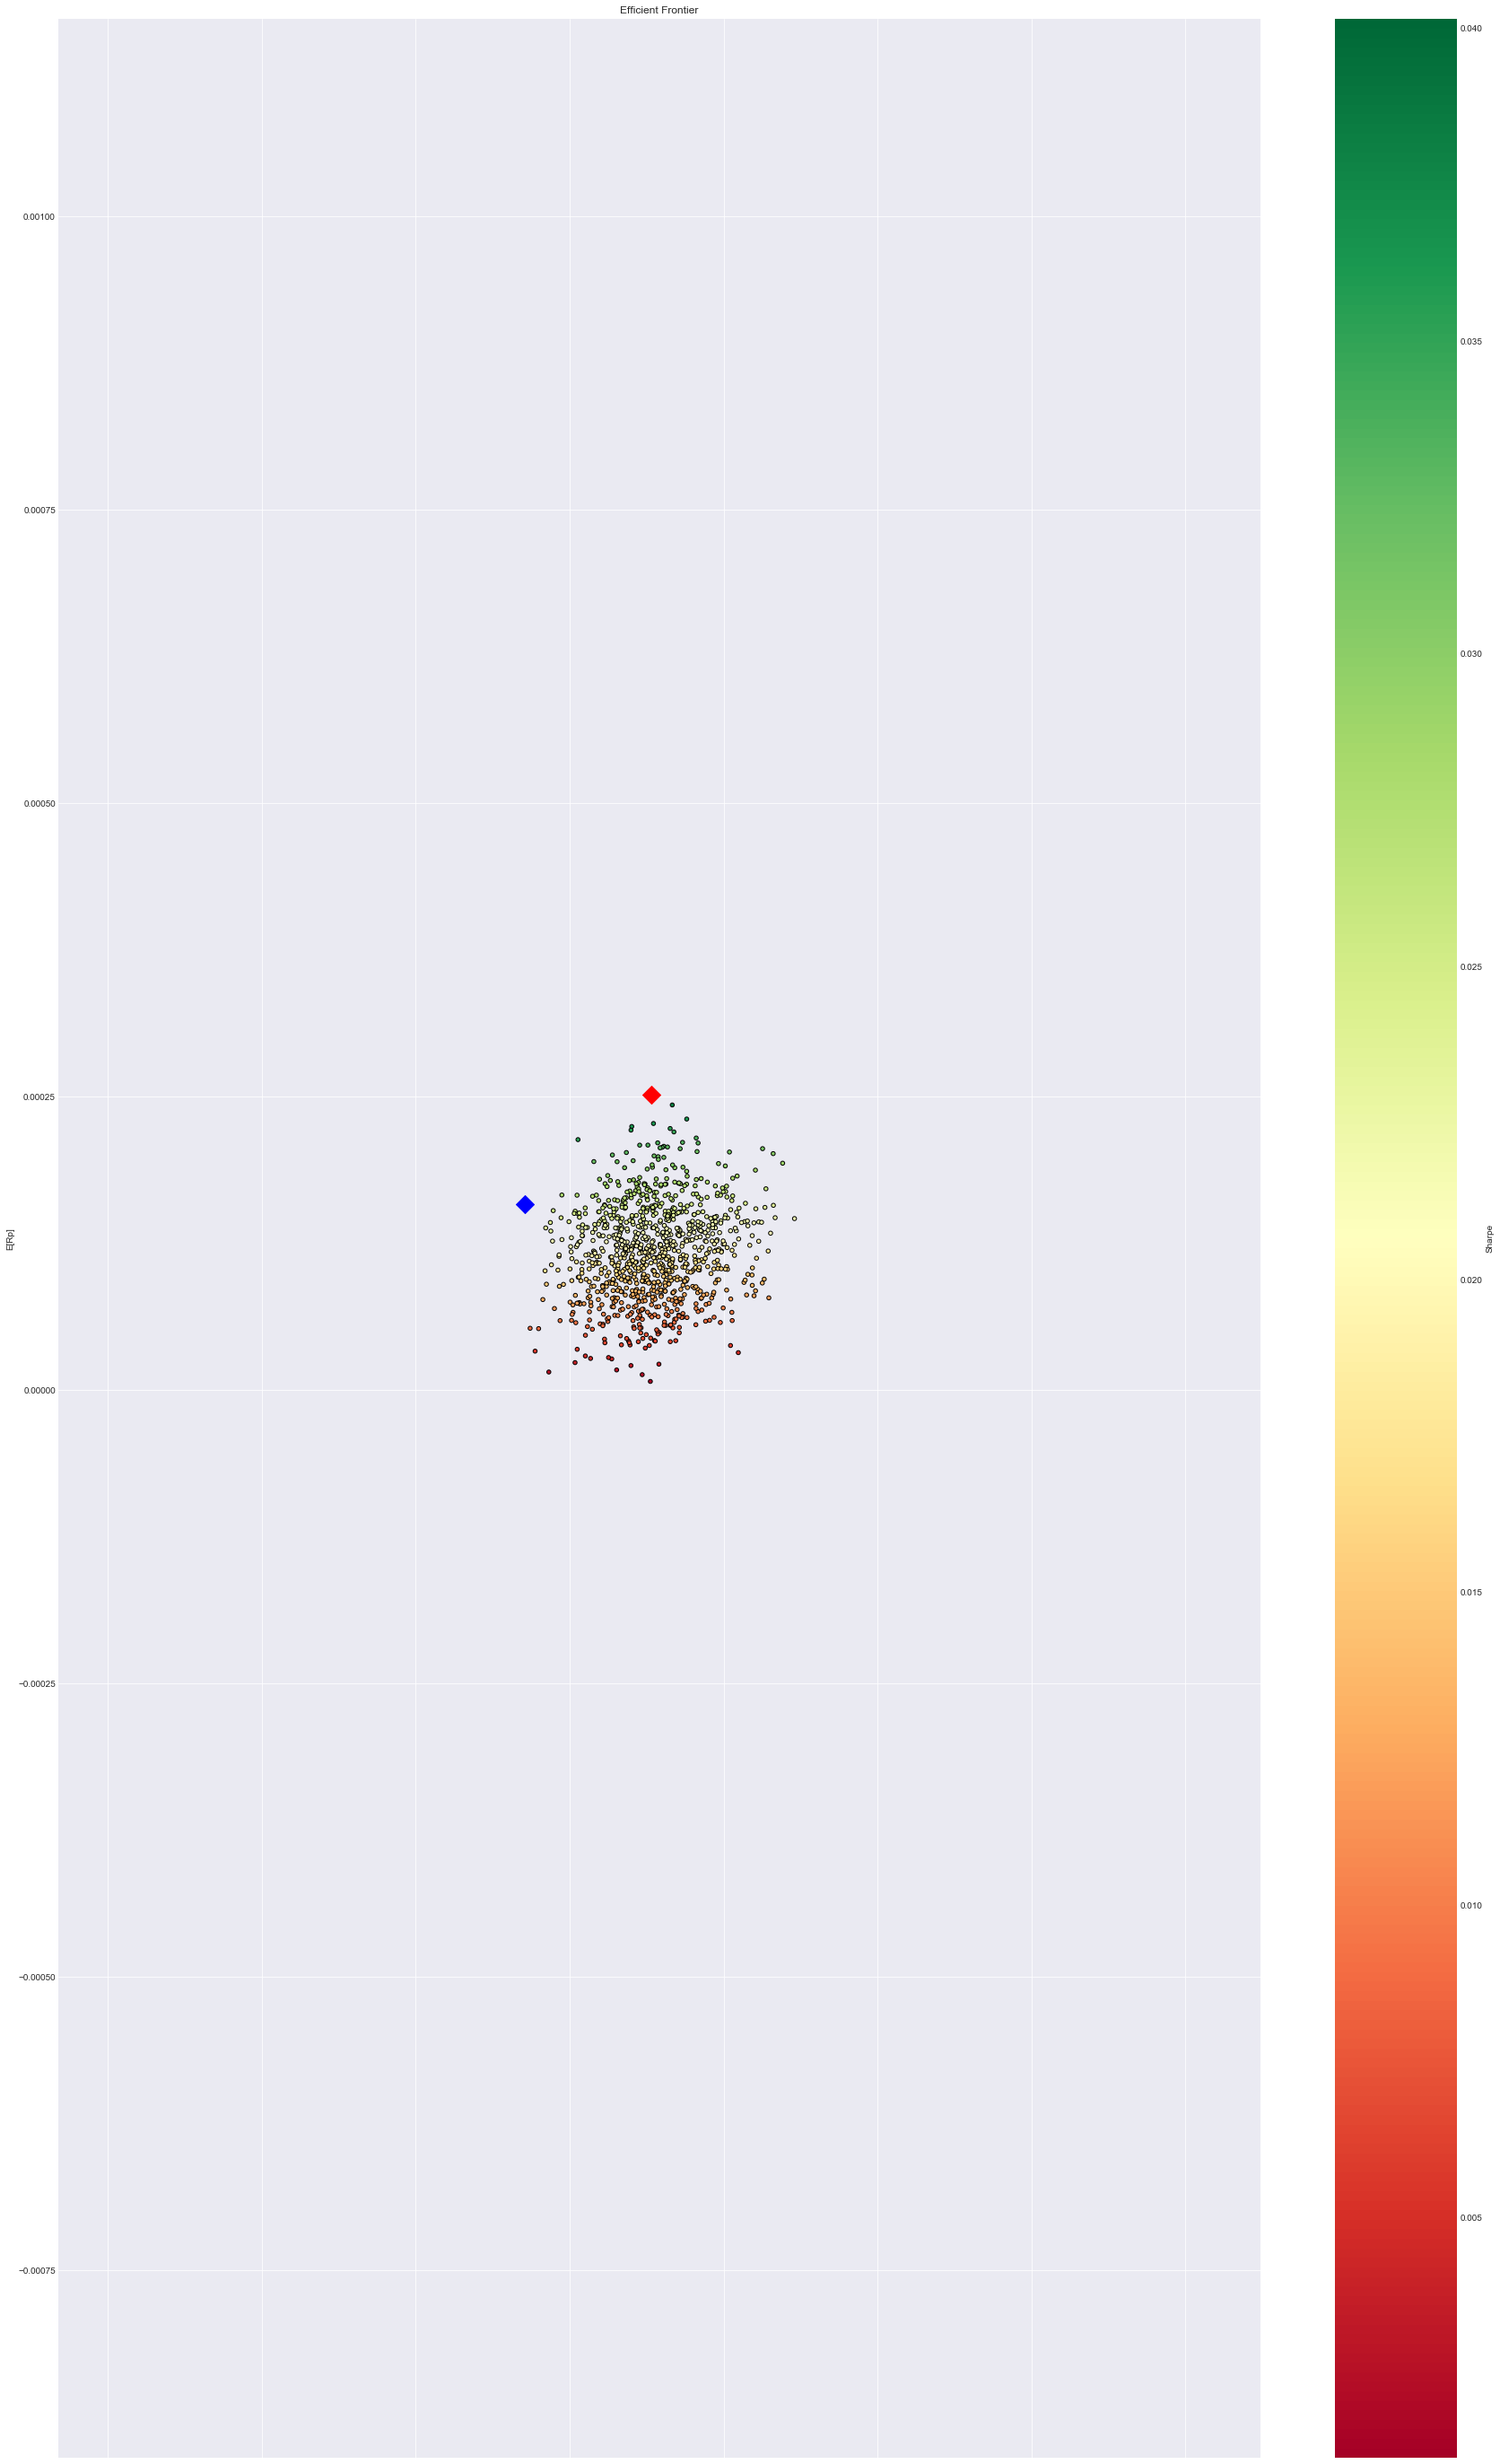

In [299]:
plt.style.use('seaborn-dark')
port.plot.scatter(x='Sigma', y='E[Rp]', c='Sharpe',
                cmap='RdYlGn', edgecolors='black' ,figsize=(30, 50), grid=True)
plt.scatter(x=sharpe_portfolio['Sigma'], y=sharpe_portfolio["E[Rp]"], c='red', marker='D', s=200)
plt.scatter(x=min_variance_port['Sigma'], y=min_variance_port["E[Rp]"], c='blue', marker='D', s=200 )
plt.xlabel('Desv. Est.')
plt.ylabel('E[Rp]')
plt.title('Efficient Frontier')

In [289]:
menor = sharpe_portfolio
w = menor.iloc[:,2]
w

11    [0.015001724546649334, 0.0007615587331729181, ...
Name: W, dtype: object